# Case study 1

--------------------------------1.read csv---------------------------------

In [1]:
import numpy as np
import pandas as pd

#read and show csv

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


------------------------------------2. Cleaning data--------------------------------------------------------

In [2]:
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [6]:
#-----replace 0 to NaN exclude Pregnancies
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [7]:
#------replace NaN to mean--------
df.fillna(df.mean(numeric_only=True), inplace = True)
print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [8]:
#----xac dinh moi tuong quan giua 2 cot
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


C:\Users\lucky\AppData\Local\Temp\ipykernel_16616\1004074335.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns)


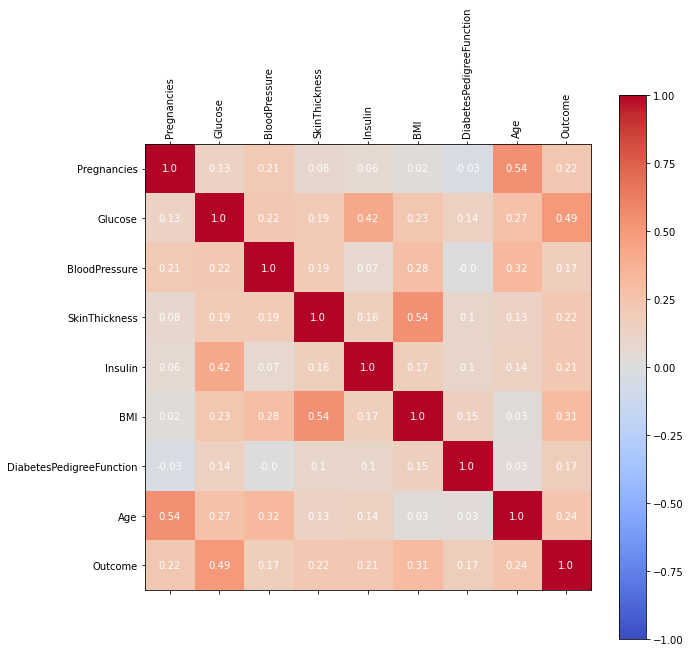

In [9]:
# display corr as matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)
#---print the correlation factor---
for i in range(df.shape[1]):
    for j in range(9):
            text = ax.text(j, i, round(corr.iloc[i][j],2),ha="center", va="center", color="w")
plt.show()

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')


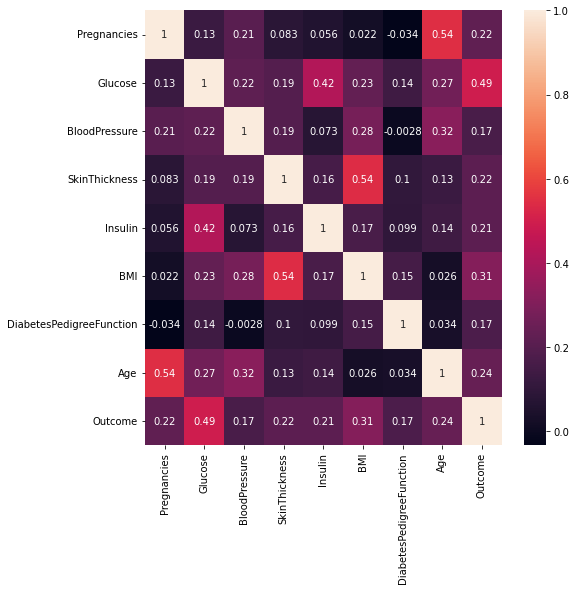

In [8]:
# display corr as matrix with seaborn
# =============================================================================
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)
print(df.corr().nlargest(4, 'Outcome').index)

In [9]:
# ky thuat du doan
#Nhận thấy 3 trường 'Glucose','BMI','Age' có hệ số liên quan lớn nhất với outcome => chọn 3 trg đó

# Logistic Regression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
#---features---
X = df[['Glucose','BMI','Age']]
#---label---
y = df.iloc[:,8]


-----------------------------------------3.ML cơ bản-------------------------------

In [10]:
#Linear
log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10,scoring='accuracy').mean()
print(log_regress_score)
result = []
result.append(log_regress_score)

0.7669856459330144


In [11]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
#---empty list that will hold cv (cross-validates) scores---
cv_scores = []
#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))
#---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)
#---get the maximum score---
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

The optimal number of neighbors is 19
0.7721462747778537


In [12]:
#Support Vector Machines (SVM)—Linear 
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)

0.7656527682843473


In [13]:
#Support Vector Machines (SVM)— RBF Kernels
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

0.765704032809296


In [14]:
# lua chon thuat toan tot nhat
print(result)
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

[0.7669856459330144, 0.7721462747778537, 0.7656527682843473, 0.765704032809296]


,Accuracy
K Nearest Neighbors,0.772146
Logistic Regression,0.766986
SVM RBF Kernel,0.765704
SVM Linear Kernel,0.765653


In [15]:
#Training and Saving the Model with kNN
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)

import pickle
#---save the model to disk---
filename = 'diabetes.sav'
#---write to the file using write and binary mode---
pickle.dump(knn, open(filename, 'wb'))
#---load the model from disk---
loaded_model = pickle.load(open('diabetes.sav', 'rb'))
Glucose = 180
BMI = 70
Age = 50
prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if (prediction[0]==0):
    print("Non-diabetic")
else:
    print("Diabetic")

[1]
Diabetic


C:\Users\lucky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [16]:
proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

[[0.15789474 0.84210526]]
Confidence: 84.21%


C:\Users\lucky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


-------------------------------4.deep learning---------------------------------

In [97]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np


In [198]:
#Tách dữ liệu train test
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.25, random_state = 75)
# X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size=0.25, random_state=1) # 0.25 x 0.75 

In [146]:
#khởi tạo sequential()
model = Sequential() 
model.add(Dense(128, input_dim=3,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(1,activation = "sigmoid")) #OutputLayer
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#Train the model and make predictions
history = model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=1000, batch_size=8)
#Make predictions from the trained model
print(history.history.keys())

Epoch 1/1000
72/72 [==============================] - 1s 3ms/step - loss: 1.3359 - accuracy: 0.5642 - val_loss: 0.6932 - val_accuracy: 0.6094
Epoch 2/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.9629 - accuracy: 0.5816 - val_loss: 0.6591 - val_accuracy: 0.6771
Epoch 3/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.8596 - accuracy: 0.5625 - val_loss: 1.0890 - val_accuracy: 0.6771
Epoch 4/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.5851 - val_loss: 0.6319 - val_accuracy: 0.6406
Epoch 5/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.7879 - accuracy: 0.6094 - val_loss: 0.7022 - val_accuracy: 0.5625
Epoch 6/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.7241 - accuracy: 0.6042 - val_loss: 0.7477 - val_accuracy: 0.6771
Epoch 7/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.7997 - accuracy: 0.5747 - val_loss: 0.6784 - val_accuracy: 0.5938
Epoch 

72/72 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7674 - val_loss: 0.5603 - val_accuracy: 0.6927
Epoch 116/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.7604 - val_loss: 0.5228 - val_accuracy: 0.7656
Epoch 117/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7448 - val_loss: 0.6150 - val_accuracy: 0.7240
Epoch 118/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7569 - val_loss: 0.5287 - val_accuracy: 0.7396
Epoch 119/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7500 - val_loss: 0.5292 - val_accuracy: 0.7448
Epoch 120/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7517 - val_loss: 0.5260 - val_accuracy: 0.7344
Epoch 121/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7569 - val_loss: 0.5109 - val_accuracy: 0.7708
Epoch 1

Epoch 172/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7674 - val_loss: 0.5601 - val_accuracy: 0.7500
Epoch 173/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7465 - val_loss: 0.5157 - val_accuracy: 0.7500
Epoch 174/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7760 - val_loss: 0.5295 - val_accuracy: 0.7708
Epoch 175/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7708 - val_loss: 0.5332 - val_accuracy: 0.7656
Epoch 176/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7760 - val_loss: 0.5209 - val_accuracy: 0.7865
Epoch 177/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7708 - val_loss: 0.5239 - val_accuracy: 0.7656
Epoch 178/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7517 - val_loss: 0.5094 - val_accuracy:

Epoch 229/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7674 - val_loss: 0.5356 - val_accuracy: 0.7604
Epoch 230/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7795 - val_loss: 0.5474 - val_accuracy: 0.7760
Epoch 231/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7604 - val_loss: 0.5244 - val_accuracy: 0.7865
Epoch 232/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.7760 - val_loss: 0.5224 - val_accuracy: 0.7865
Epoch 233/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7760 - val_loss: 0.5463 - val_accuracy: 0.7604
Epoch 234/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7726 - val_loss: 0.5333 - val_accuracy: 0.7656
Epoch 235/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.7795 - val_loss: 0.5370 - val_accuracy:

Epoch 286/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.7708 - val_loss: 0.5140 - val_accuracy: 0.7604
Epoch 287/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.7743 - val_loss: 0.5196 - val_accuracy: 0.7865
Epoch 288/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7604 - val_loss: 0.5331 - val_accuracy: 0.7500
Epoch 289/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.7726 - val_loss: 0.5126 - val_accuracy: 0.7708
Epoch 290/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7622 - val_loss: 0.5296 - val_accuracy: 0.7708
Epoch 291/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7795 - val_loss: 0.5184 - val_accuracy: 0.7865
Epoch 292/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.7708 - val_loss: 0.5467 - val_accuracy:

Epoch 343/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.7743 - val_loss: 0.5349 - val_accuracy: 0.7865
Epoch 344/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7778 - val_loss: 0.5172 - val_accuracy: 0.7708
Epoch 345/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7882 - val_loss: 0.5303 - val_accuracy: 0.7917
Epoch 346/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.7830 - val_loss: 0.5254 - val_accuracy: 0.7812
Epoch 347/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.7760 - val_loss: 0.5194 - val_accuracy: 0.7865
Epoch 348/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.7656 - val_loss: 0.5547 - val_accuracy: 0.7656
Epoch 349/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.7934 - val_loss: 0.4970 - val_accuracy:

Epoch 400/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.7795 - val_loss: 0.5163 - val_accuracy: 0.7812
Epoch 401/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7726 - val_loss: 0.5236 - val_accuracy: 0.7812
Epoch 402/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.7882 - val_loss: 0.5321 - val_accuracy: 0.7812
Epoch 403/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.7865 - val_loss: 0.5256 - val_accuracy: 0.7708
Epoch 404/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7830 - val_loss: 0.5088 - val_accuracy: 0.7812
Epoch 405/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.7899 - val_loss: 0.5256 - val_accuracy: 0.7708
Epoch 406/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7830 - val_loss: 0.5171 - val_accuracy:

Epoch 457/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.7934 - val_loss: 0.5139 - val_accuracy: 0.7500
Epoch 458/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7778 - val_loss: 0.5212 - val_accuracy: 0.7969
Epoch 459/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.7969 - val_loss: 0.5223 - val_accuracy: 0.7760
Epoch 460/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7847 - val_loss: 0.5189 - val_accuracy: 0.7812
Epoch 461/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.7899 - val_loss: 0.5264 - val_accuracy: 0.7865
Epoch 462/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7865 - val_loss: 0.5321 - val_accuracy: 0.7760
Epoch 463/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.7899 - val_loss: 0.5164 - val_accuracy:

Epoch 514/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.7830 - val_loss: 0.5060 - val_accuracy: 0.7917
Epoch 515/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.7830 - val_loss: 0.5251 - val_accuracy: 0.7760
Epoch 516/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.7865 - val_loss: 0.5237 - val_accuracy: 0.7708
Epoch 517/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.7795 - val_loss: 0.5060 - val_accuracy: 0.7969
Epoch 518/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8038 - val_loss: 0.4993 - val_accuracy: 0.7917
Epoch 519/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.7917 - val_loss: 0.5116 - val_accuracy: 0.7812
Epoch 520/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.7899 - val_loss: 0.5071 - val_accuracy:

Epoch 571/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8021 - val_loss: 0.5303 - val_accuracy: 0.7708
Epoch 572/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.7882 - val_loss: 0.5027 - val_accuracy: 0.7812
Epoch 573/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8003 - val_loss: 0.5016 - val_accuracy: 0.7865
Epoch 574/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.7882 - val_loss: 0.4931 - val_accuracy: 0.7760
Epoch 575/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.7865 - val_loss: 0.5107 - val_accuracy: 0.7708
Epoch 576/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7899 - val_loss: 0.4924 - val_accuracy: 0.7708
Epoch 577/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8038 - val_loss: 0.5175 - val_accuracy:

Epoch 628/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.7795 - val_loss: 0.5609 - val_accuracy: 0.7812
Epoch 629/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.7865 - val_loss: 0.5418 - val_accuracy: 0.7760
Epoch 630/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.7812 - val_loss: 0.5478 - val_accuracy: 0.7865
Epoch 631/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.7847 - val_loss: 0.5345 - val_accuracy: 0.7500
Epoch 632/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.7795 - val_loss: 0.5191 - val_accuracy: 0.7656
Epoch 633/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7847 - val_loss: 0.5422 - val_accuracy: 0.7760
Epoch 634/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.7899 - val_loss: 0.5374 - val_accuracy:

Epoch 685/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.7969 - val_loss: 0.6160 - val_accuracy: 0.7552
Epoch 686/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.7934 - val_loss: 0.5555 - val_accuracy: 0.7969
Epoch 687/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8021 - val_loss: 0.5447 - val_accuracy: 0.7760
Epoch 688/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8003 - val_loss: 0.5531 - val_accuracy: 0.7760
Epoch 689/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.7934 - val_loss: 0.5350 - val_accuracy: 0.7708
Epoch 690/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.7951 - val_loss: 0.5556 - val_accuracy: 0.7656
Epoch 691/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.7917 - val_loss: 0.5415 - val_accuracy:

Epoch 742/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8021 - val_loss: 0.5436 - val_accuracy: 0.7708
Epoch 743/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.7969 - val_loss: 0.5498 - val_accuracy: 0.7552
Epoch 744/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8021 - val_loss: 0.5197 - val_accuracy: 0.7865
Epoch 745/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.7969 - val_loss: 0.5309 - val_accuracy: 0.7812
Epoch 746/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.7934 - val_loss: 0.5231 - val_accuracy: 0.8073
Epoch 747/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8108 - val_loss: 0.5388 - val_accuracy: 0.7969
Epoch 748/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.7934 - val_loss: 0.5365 - val_accuracy:

Epoch 799/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.7969 - val_loss: 0.5229 - val_accuracy: 0.7865
Epoch 800/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.7986 - val_loss: 0.5589 - val_accuracy: 0.7656
Epoch 801/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8021 - val_loss: 0.5449 - val_accuracy: 0.7760
Epoch 802/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.7899 - val_loss: 0.5578 - val_accuracy: 0.7708
Epoch 803/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8056 - val_loss: 0.5495 - val_accuracy: 0.7708
Epoch 804/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8021 - val_loss: 0.5495 - val_accuracy: 0.7969
Epoch 805/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.7934 - val_loss: 0.5498 - val_accuracy:

Epoch 856/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8003 - val_loss: 0.5609 - val_accuracy: 0.7552
Epoch 857/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8160 - val_loss: 0.5603 - val_accuracy: 0.7604
Epoch 858/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8108 - val_loss: 0.5510 - val_accuracy: 0.7604
Epoch 859/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.7934 - val_loss: 0.5419 - val_accuracy: 0.7760
Epoch 860/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.7969 - val_loss: 0.5472 - val_accuracy: 0.7708
Epoch 861/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.7917 - val_loss: 0.5536 - val_accuracy: 0.7812
Epoch 862/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8038 - val_loss: 0.5451 - val_accuracy:

Epoch 969/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8090 - val_loss: 0.5873 - val_accuracy: 0.7656
Epoch 970/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8090 - val_loss: 0.5758 - val_accuracy: 0.8125
Epoch 971/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8142 - val_loss: 0.5717 - val_accuracy: 0.7865
Epoch 972/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8090 - val_loss: 0.5811 - val_accuracy: 0.7812
Epoch 973/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8125 - val_loss: 0.6014 - val_accuracy: 0.7708
Epoch 974/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8021 - val_loss: 0.6126 - val_accuracy: 0.7865
Epoch 975/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8038 - val_loss: 0.6313 - val_accuracy:

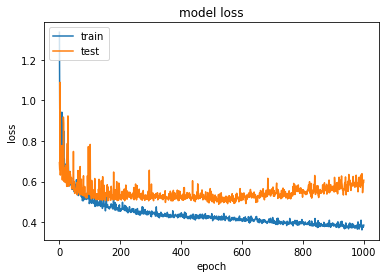

In [147]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

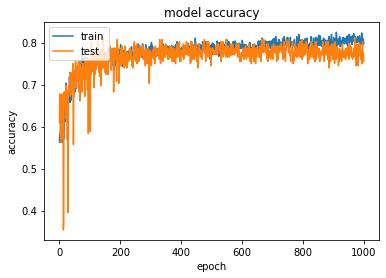

In [148]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [254]:
#khởi tạo sequential()
model = Sequential() 
model.add(Dense(128, input_dim=3,activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation = "sigmoid")) #OutputLayer
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#Train the model and make predictions
history = model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=500, batch_size=16)
#Make predictions from the trained model
print(history.history.keys())

Epoch 1/500
36/36 [==============================] - 1s 7ms/step - loss: 3.8921 - accuracy: 0.5035 - val_loss: 0.7754 - val_accuracy: 0.6042
Epoch 2/500
36/36 [==============================] - 0s 2ms/step - loss: 3.6399 - accuracy: 0.5156 - val_loss: 1.1379 - val_accuracy: 0.6406
Epoch 3/500
36/36 [==============================] - 0s 2ms/step - loss: 2.7585 - accuracy: 0.5451 - val_loss: 0.7923 - val_accuracy: 0.6667
Epoch 4/500
36/36 [==============================] - 0s 2ms/step - loss: 2.6018 - accuracy: 0.5156 - val_loss: 1.0455 - val_accuracy: 0.6406
Epoch 5/500
36/36 [==============================] - 0s 3ms/step - loss: 2.6098 - accuracy: 0.4913 - val_loss: 1.3206 - val_accuracy: 0.6406
Epoch 6/500
36/36 [==============================] - 0s 2ms/step - loss: 2.0220 - accuracy: 0.5486 - val_loss: 1.2804 - val_accuracy: 0.6406
Epoch 7/500
36/36 [==============================] - 0s 2ms/step - loss: 1.6248 - accuracy: 0.5590 - val_loss: 0.7079 - val_accuracy: 0.6302
Epoch 8/500
3

Epoch 59/500
36/36 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.6840 - val_loss: 0.5860 - val_accuracy: 0.6823
Epoch 60/500
36/36 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.6927 - val_loss: 0.6044 - val_accuracy: 0.6667
Epoch 61/500
36/36 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.7031 - val_loss: 0.5834 - val_accuracy: 0.7031
Epoch 62/500
36/36 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.6962 - val_loss: 0.5967 - val_accuracy: 0.6771
Epoch 63/500
36/36 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.6962 - val_loss: 0.6056 - val_accuracy: 0.6615
Epoch 64/500
36/36 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.7049 - val_loss: 0.5940 - val_accuracy: 0.6927
Epoch 65/500
36/36 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.6892 - val_loss: 0.5995 - val_accuracy: 0.7188
Epoch 

36/36 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.7344 - val_loss: 0.5260 - val_accuracy: 0.7396
Epoch 174/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7378 - val_loss: 0.5333 - val_accuracy: 0.7604
Epoch 175/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7378 - val_loss: 0.5167 - val_accuracy: 0.7500
Epoch 176/500
36/36 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7500 - val_loss: 0.5175 - val_accuracy: 0.7188
Epoch 177/500
36/36 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7240 - val_loss: 0.5300 - val_accuracy: 0.7240
Epoch 178/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.7292 - val_loss: 0.5074 - val_accuracy: 0.7448
Epoch 179/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7170 - val_loss: 0.5334 - val_accuracy: 0.7292
Epoch 180/500

36/36 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7569 - val_loss: 0.4770 - val_accuracy: 0.7812
Epoch 288/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7587 - val_loss: 0.4751 - val_accuracy: 0.7812
Epoch 289/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7413 - val_loss: 0.4910 - val_accuracy: 0.7552
Epoch 290/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7257 - val_loss: 0.5034 - val_accuracy: 0.7240
Epoch 291/500
36/36 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7535 - val_loss: 0.4837 - val_accuracy: 0.7917
Epoch 292/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.7344 - val_loss: 0.5587 - val_accuracy: 0.6979
Epoch 293/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7587 - val_loss: 0.4654 - val_accuracy: 0.7969
Epoch 294/500

36/36 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.7552 - val_loss: 0.4915 - val_accuracy: 0.7604
Epoch 345/500
36/36 [==============================] - 0s 3ms/step - loss: 0.4942 - accuracy: 0.7726 - val_loss: 0.4981 - val_accuracy: 0.7396
Epoch 346/500
36/36 [==============================] - 0s 3ms/step - loss: 0.5080 - accuracy: 0.7465 - val_loss: 0.4858 - val_accuracy: 0.7812
Epoch 347/500
36/36 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7569 - val_loss: 0.4800 - val_accuracy: 0.7865
Epoch 348/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7535 - val_loss: 0.5065 - val_accuracy: 0.7292
Epoch 349/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7517 - val_loss: 0.4715 - val_accuracy: 0.7812
Epoch 350/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7569 - val_loss: 0.4771 - val_accuracy: 0.7865
Epoch 351/500

36/36 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.7361 - val_loss: 0.4778 - val_accuracy: 0.7760
Epoch 459/500
36/36 [==============================] - 0s 3ms/step - loss: 0.4876 - accuracy: 0.7691 - val_loss: 0.4728 - val_accuracy: 0.7917
Epoch 460/500
36/36 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.7656 - val_loss: 0.4715 - val_accuracy: 0.7760
Epoch 461/500
36/36 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.7587 - val_loss: 0.4930 - val_accuracy: 0.7396
Epoch 462/500
36/36 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.7587 - val_loss: 0.4889 - val_accuracy: 0.7500
Epoch 463/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7500 - val_loss: 0.4749 - val_accuracy: 0.7917
Epoch 464/500
36/36 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7431 - val_loss: 0.4864 - val_accuracy: 0.7760
Epoch 465/500

In [255]:
# evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.802


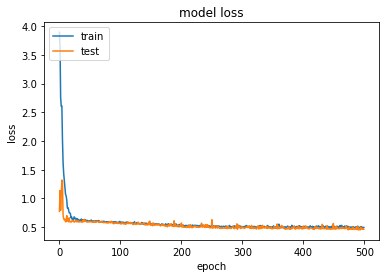

In [256]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

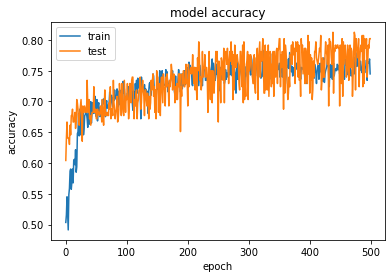

In [257]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [258]:

# predictions = (predictions > 0.5)
predictions = model.predict(X_test)
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0
predictions


array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [259]:
pre = model.predict([[140,70,60]])
pre

array([[0.8486539]], dtype=float32)

# Case study 2

---------------------1.read csv-----------------------------

In [10]:
#--------Import-----------
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Read csv 
d1=pd.read_csv("diemthi.csv")
d1.columns = ["Ho_ten", "10%", "20%","20%_1",'Thi']
d1

,Ho_ten,10%,20%,20%_1,Thi
0,31_011,8.375,7.25,8.50,9.0
1,31_012,8.250,7.25,8.50,9.0
2,31_013,8.500,7.50,8.50,10.0
3,31_014,4.000,7.25,8.50,9.0
4,31_015,8.750,7.50,8.50,9.5
...,...,...,...,...,...
70,31_151,8.250,7.75,8.25,8.0
71,31_152,3.500,3.25,6.00,6.5
72,31_153,7.250,6.50,6.00,6.5
73,31_154,7.750,3.50,7.50,7.5


In [12]:
d2 = pd.read_csv('diemthi_3_2.csv')
print(d2)
d2=d2.drop('BT bo sung',axis=1)
d2.columns = ["Ho_ten", "10%", "20%","20%_1",'Thi']
d2

   Unnamed: 0   10%   20%  BT bo sung  20%.1   Thi
0      32_011  7.25   6.5        6.00   6.50  6.75
1      32_012     7   7.5        5.00   7.50  7.00
2      32_013     7  7.25        5.25   7.25  7.00
3      32_014   6.5     7        5.25   7.00  6.50
4      32_015   7.5     7        5.00   7.00  7.25
..        ...   ...   ...         ...    ...   ...
64     32_151   5.5  6.75        6.75   6.75  6.50
65     32_152     7     7        6.00   6.50  6.00
66     32_153     4     7        6.00   6.50  6.00
67     32_154   7.5     7        8.00   8.00  7.00
68     32_155   3.5     3        5.50   5.50  5.00

[69 rows x 6 columns]


,Ho_ten,10%,20%,20%_1,Thi
0,32_011,7.25,6.5,6.50,6.75
1,32_012,7,7.5,7.50,7.00
2,32_013,7,7.25,7.25,7.00
3,32_014,6.5,7,7.00,6.50
4,32_015,7.5,7,7.00,7.25
...,...,...,...,...,...
64,32_151,5.5,6.75,6.75,6.50
65,32_152,7,7,6.50,6.00
66,32_153,4,7,6.50,6.00
67,32_154,7.5,7,8.00,7.00


In [13]:
d3=pd.read_csv("lop71.csv")
d3.columns = ["Ho_ten", "10%", "20%","20%_1",'Thi']
d3

,Ho_ten,10%,20%,20%_1,Thi
0,71_011,6.50,6.50,6.0,6.50
1,71_012,5.50,5.50,6.0,5.00
2,71_013,6.50,7.00,7.0,6.75
3,71_014,7.25,5.50,7.0,6.00
4,71_021,7.50,5.00,6.0,6.00
...,...,...,...,...,...
71,71_146,7.00,6.75,7.5,6.50
72,71_151,7.50,7.00,8.0,9.00
73,71_152,7.00,6.50,6.5,6.50
74,71_153,7.00,7.00,7.5,7.50


In [14]:
d4=pd.read_csv("lop72 (1).csv")
d4.columns = ["Ho_ten", "10%", "20%","20%_1",'Thi']
d4

,Ho_ten,10%,20%,20%_1,Thi
0,72_011,6.000,6.500,7.00,6.75
1,72_012,6.500,7.250,7.75,7.50
2,72_013,5.750,6.750,7.25,7.00
3,72_014,6.750,7.000,7.50,7.25
4,72_015,6.000,6.500,7.00,6.75
...,...,...,...,...,...
72,72_151,7.375,6.500,7.50,7.00
73,72_152,7.250,6.750,7.00,7.00
74,72_153,7.125,6.750,6.75,7.00
75,72_154,7.750,6.375,7.50,7.00


In [27]:
# gộp theo hàng
df = pd.concat([d1,d2,d3,d4], axis=0)
print(df.shape)
df

(297, 5)


,Ho_ten,10%,20%,20%_1,Thi
0,31_011,8.375,7.25,8.50,9.0
1,31_012,8.25,7.25,8.50,9.0
2,31_013,8.5,7.5,8.50,10.0
3,31_014,4.0,7.25,8.50,9.0
4,31_015,8.75,7.5,8.50,9.5
...,...,...,...,...,...
72,72_151,7.375,6.5,7.50,7.0
73,72_152,7.25,6.75,7.00,7.0
74,72_153,7.125,6.75,6.75,7.0
75,72_154,7.75,6.375,7.50,7.0


-----------------------------2.Clean data---------------------------------

In [28]:
# reset index
df = df.reset_index(drop=True)
df

,Ho_ten,10%,20%,20%_1,Thi
0,31_011,8.375,7.25,8.50,9.0
1,31_012,8.25,7.25,8.50,9.0
2,31_013,8.5,7.5,8.50,10.0
3,31_014,4.0,7.25,8.50,9.0
4,31_015,8.75,7.5,8.50,9.5
...,...,...,...,...,...
292,72_151,7.375,6.5,7.50,7.0
293,72_152,7.25,6.75,7.00,7.0
294,72_153,7.125,6.75,6.75,7.0
295,72_154,7.75,6.375,7.50,7.0


In [29]:
#loại bỏ cột dữ liệu không dùng đến
df = df.drop('Ho_ten',axis=1)
df

,10%,20%,20%_1,Thi
0,8.375,7.25,8.50,9.0
1,8.25,7.25,8.50,9.0
2,8.5,7.5,8.50,10.0
3,4.0,7.25,8.50,9.0
4,8.75,7.5,8.50,9.5
...,...,...,...,...
292,7.375,6.5,7.50,7.0
293,7.25,6.75,7.00,7.0
294,7.125,6.75,6.75,7.0
295,7.75,6.375,7.50,7.0


In [30]:
# Kiểm tra kiểu dữ liệu
df.dtypes

10%       object
20%       object
20%_1    float64
Thi      float64
dtype: object

In [31]:
#chuyển object thành float
cols = ['10%', '20%']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df.dtypes

10%      float64
20%      float64
20%_1    float64
Thi      float64
dtype: object

In [33]:
#loại bỏ các dữ liệu trùng nhau
df = df.drop_duplicates()
# reset index
df = df.reset_index(drop=True)
df

,10%,20%,20%_1,Thi
0,8.375,7.250,8.50,9.0
1,8.250,7.250,8.50,9.0
2,8.500,7.500,8.50,10.0
3,4.000,7.250,8.50,9.0
4,8.750,7.500,8.50,9.5
...,...,...,...,...
269,7.375,6.500,7.50,7.0
270,7.250,6.750,7.00,7.0
271,7.125,6.750,6.75,7.0
272,7.750,6.375,7.50,7.0


In [34]:
#kiểm tra 0
df.eq(0).sum()

10%      3
20%      4
20%_1    4
Thi      4
dtype: int64

In [35]:
# Thay thế thành NaN
df = df.replace(0,np.NaN)
print(df.eq(0).sum())

10%      0
20%      0
20%_1    0
Thi      0
dtype: int64


In [36]:
# Thay thế NaN thành mean
df.fillna(df.mean(numeric_only=True), inplace = True)
print(df.isnull().sum())


10%      0
20%      0
20%_1    0
Thi      0
dtype: int64


In [14]:
df.describe()

,10%,20%,20%_1,Thi
count,274.000000,274.000000,274.000000,274.000000
mean,7.472705,6.726974,7.018773,6.953184
std,1.175449,1.050807,0.751452,0.908426
min,0.500000,2.625000,5.000000,5.000000
25%,7.000000,6.500000,6.500000,6.500000
50%,7.500000,7.000000,7.000000,7.000000
75%,8.000000,7.250000,7.500000,7.500000
max,10.000000,8.750000,9.500000,10.000000


---------------------------------------ML cơ bản----------------------------------------

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [40]:
X = df.drop("Thi",axis = 1)
Y = df["Thi"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)

In [42]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
log_regress_score = cross_val_score(reg, X_test, y_test, cv=10,scoring='accuracy').mean()
print(log_regress_score)

print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_pred, y_test)))
data = {'result': y_test,'Predict':y_pred}
dt = pd.DataFrame(data)
# pd.concat([X_test, dt],axis=1)
dt
# print(reg.score(X_test, y_test))

nan
Root Mean Squared Error: 0.5538050219459073


C:\Users\lucky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lucky\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\lucky\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\lucky\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\lucky\anaconda3\lib\site-packages\sklearn\metrics\_classification

,result,Predict
59,8.000000,7.414334
266,6.953184,6.956380
225,7.500000,7.449465
251,6.500000,7.480013
191,6.500000,6.557662
125,6.000000,6.080069
124,6.500000,6.004744
144,6.000000,5.948712
201,6.953184,6.971107
75,7.250000,6.980271


In [43]:
# make predict
res = reg.predict([[7.125,7.000000,7.500000]])
res

C:\Users\lucky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.41433435])

-----------------------------------------------------deep learning------------------------------------------

In [44]:
#--------------------------Deep learning--------------------------
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np

In [45]:

X = df.drop("Thi",axis = 1)
Y = df["Thi"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)
X

,10%,20%,20%_1
0,8.375,7.250,8.50
1,8.250,7.250,8.50
2,8.500,7.500,8.50
3,4.000,7.250,8.50
4,8.750,7.500,8.50
...,...,...,...
269,7.375,6.500,7.50
270,7.250,6.750,7.00
271,7.125,6.750,6.75
272,7.750,6.375,7.50


In [46]:
model = Sequential() 
model.add(Dense(128, input_dim=3,activation = "relu"))
# model.add(Dropout(0.2))
model.add(Dense(64,activation = "relu")) 
# model.add(Dropout(0.2))
model.add(Dense(1,activation = "linear")) 
# linear
model.compile(loss='mse', optimizer='adam',metrics=['mean_squared_error'])
# mean_squared_error
#Train the model and make predictions
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=95,batch_size=8)
#Make predictions from the trained model

Epoch 1/95
28/28 [==============================] - 1s 7ms/step - loss: 7.1245 - mean_squared_error: 7.1245 - val_loss: 0.5752 - val_mean_squared_error: 0.5752
Epoch 2/95
28/28 [==============================] - 0s 3ms/step - loss: 0.6746 - mean_squared_error: 0.6746 - val_loss: 0.5905 - val_mean_squared_error: 0.5905
Epoch 3/95
28/28 [==============================] - 0s 2ms/step - loss: 0.4870 - mean_squared_error: 0.4870 - val_loss: 0.3716 - val_mean_squared_error: 0.3716
Epoch 4/95
28/28 [==============================] - 0s 3ms/step - loss: 0.3928 - mean_squared_error: 0.3928 - val_loss: 0.3296 - val_mean_squared_error: 0.3296
Epoch 5/95
28/28 [==============================] - 0s 3ms/step - loss: 0.3712 - mean_squared_error: 0.3712 - val_loss: 0.3224 - val_mean_squared_error: 0.3224
Epoch 6/95
28/28 [==============================] - 0s 2ms/step - loss: 0.3663 - mean_squared_error: 0.3663 - val_loss: 0.2849 - val_mean_squared_error: 0.2849
Epoch 7/95
28/28 [======================

Epoch 52/95
28/28 [==============================] - 0s 2ms/step - loss: 0.3350 - mean_squared_error: 0.3350 - val_loss: 0.2771 - val_mean_squared_error: 0.2771
Epoch 53/95
28/28 [==============================] - ETA: 0s - loss: 0.4658 - mean_squared_error: 0.46 - 0s 3ms/step - loss: 0.3393 - mean_squared_error: 0.3393 - val_loss: 0.2583 - val_mean_squared_error: 0.2583
Epoch 54/95
28/28 [==============================] - 0s 3ms/step - loss: 0.3282 - mean_squared_error: 0.3282 - val_loss: 0.2597 - val_mean_squared_error: 0.2597
Epoch 55/95
28/28 [==============================] - 0s 3ms/step - loss: 0.3338 - mean_squared_error: 0.3338 - val_loss: 0.3009 - val_mean_squared_error: 0.3009
Epoch 56/95
28/28 [==============================] - 0s 4ms/step - loss: 0.3693 - mean_squared_error: 0.3693 - val_loss: 0.2977 - val_mean_squared_error: 0.2977
Epoch 57/95
28/28 [==============================] - 0s 3ms/step - loss: 0.3769 - mean_squared_error: 0.3769 - val_loss: 0.3259 - val_mean_squa

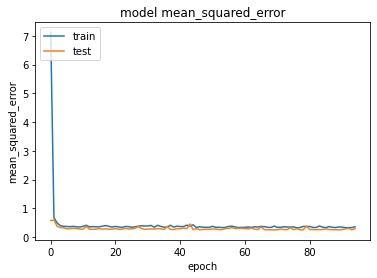

In [47]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

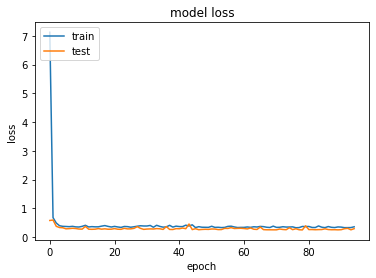

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Mean_squared_error: %.3f' % acc)

Test Accuracy: 0.290


In [54]:
predictions = model.predict(X_test)
# sample = pd.DataFrame(predictions,columns=['Predict'])
# data =pd.DataFrame(y_test)
print(X_test.head(10))
y_test.head(10)

       10%       20%     20%_1
59   7.125  7.000000  7.500000
266  7.250  6.726974  7.018773
225  7.250  7.250000  7.500000
251  7.125  7.500000  7.500000
191  8.500  7.000000  6.500000
125  6.500  7.000000  6.000000
124  7.000  3.000000  6.500000
144  6.500  6.000000  6.000000
201  7.000  7.000000  7.000000
75   7.500  7.000000  7.000000


59     8.000000
266    6.953184
225    7.500000
251    6.500000
191    6.500000
125    6.000000
124    6.500000
144    6.000000
201    6.953184
75     7.250000
Name: Thi, dtype: float64

In [55]:
prediction = pd.DataFrame(predictions)
prediction.head(10)

,0
0,7.449138
1,7.076797
2,7.517867
3,7.557687
4,6.807546
5,6.352349
6,6.371348
7,6.113914
8,7.089749
9,7.169809


In [56]:
#đánh giá đỗ chính xác
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.2901 - mean_squared_error: 0.2901


[0.2901323735713959, 0.2901323735713959]

In [57]:
pre = model.predict([[7.125,7.000000,7.500000]])
pre

array([[7.4491377]], dtype=float32)

# Case study 3

In [39]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from random import *

In [6]:
#read and show dataset
data_train = pd.read_csv('fashion-mnist_train.csv', header = 0)
data_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
labels = data_train['label'].values.reshape(1, 60000)
train = data_train.drop('label', axis=1).transpose()

In [15]:
labels

array([[2, 9, 6, ..., 8, 8, 7]], dtype=int64)

In [17]:
# chuyen doi gia tri tu 0->255 he mau xam sang khoang gia tri tu 0->1
train = np.array(train / 255.0)
train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

---------------------------------------------------------------------------------
Xay dung mang noron
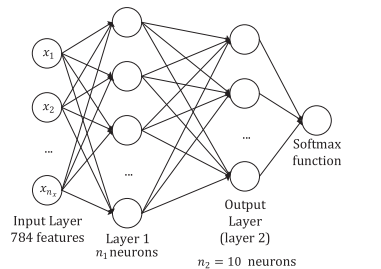

In [52]:
# chuẩn hóa labels
# Do có 10 nhãn từ 0->9, ta cần tách thành 0,1 để dễ xử lý=> cần 10 cột để hiển thị cho các nhãn từ 0->9
# tạo mảng zero với 60000 cột , mỗi cột 10 hàng
# gán cho mỗi hàng giá trị = 1 ứng với nhãn tương ứng(vd hàng labels[0] = 2 => gán labels[0][2] = 1 ) 
# reshape về ma trận [10,60000]
labels_ = np.zeros((60000, 10))
labels_[np.arange(60000),labels] = 1
labels_ = labels_.transpose()
labels_ = np.array(labels_)
labels_.shape


(10, 60000)

In [41]:
#create neuron network với 784 đầu vào, 2 lớp ẩn(n1=5, n2=10) activation = relu, 1 đẩu ra activation = softmax
#optimizer adam, 
tf.compat.v1.disable_eager_execution()
n_dim = 784
tf.reset_default_graph()
# Number of neurons in the layers
n1 = 5 # Number of neurons in layer 1
n2 = 10 # Number of neurons in output layer
cost_history = np.empty(shape=[1], dtype = float)
learning_rate = tf.placeholder(tf.float32, shape=())
X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
W1 = tf.Variable(tf. truncated_normal ([n1, n_dim], stddev=.1))
b1 = tf.Variable(tf.zeros([n1,1]))
W2 = tf.Variable(tf. truncated_normal ([n2, n1], stddev=.1))
b2 = tf.Variable(tf.zeros([n2,1]))
# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1, X) + b1)
Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2)
y_ = tf.nn.softmax(Z2,0)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [43]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
training_epochs = 5000
cost_history = []
for epoch in range(training_epochs+1):
    sess.run(optimizer, feed_dict = {X: train, Y: labels_, learning_rate:0.001})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_, learning_rate:0.001})
    cost_history = np.append(cost_history, cost_)
    if (epoch % 20 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

Reached epoch 0 cost J = 0.32556996
Reached epoch 20 cost J = 0.31291193
Reached epoch 40 cost J = 0.29714134
Reached epoch 60 cost J = 0.2814866
Reached epoch 80 cost J = 0.2640986
Reached epoch 100 cost J = 0.24759796
Reached epoch 120 cost J = 0.23475415
Reached epoch 140 cost J = 0.22485101
Reached epoch 160 cost J = 0.21503815
Reached epoch 180 cost J = 0.20433939
Reached epoch 200 cost J = 0.19325048
Reached epoch 220 cost J = 0.18032223
Reached epoch 240 cost J = 0.17011179
Reached epoch 260 cost J = 0.1607684
Reached epoch 280 cost J = 0.15160581
Reached epoch 300 cost J = 0.13653418
Reached epoch 320 cost J = 0.122566566
Reached epoch 340 cost J = 0.11578656
Reached epoch 360 cost J = 0.11168843
Reached epoch 380 cost J = 0.1085175
Reached epoch 400 cost J = 0.105738565
Reached epoch 420 cost J = 0.10322301
Reached epoch 440 cost J = 0.10096651
Reached epoch 460 cost J = 0.09895177
Reached epoch 480 cost J = 0.09715718
Reached epoch 500 cost J = 0.09558783
Reached epoch 520 co

Reached epoch 4680 cost J = nan
Reached epoch 4700 cost J = nan
Reached epoch 4720 cost J = nan
Reached epoch 4740 cost J = nan
Reached epoch 4760 cost J = nan
Reached epoch 4780 cost J = nan
Reached epoch 4800 cost J = nan
Reached epoch 4820 cost J = nan
Reached epoch 4840 cost J = nan
Reached epoch 4860 cost J = nan
Reached epoch 4880 cost J = nan
Reached epoch 4900 cost J = nan
Reached epoch 4920 cost J = nan
Reached epoch 4940 cost J = nan
Reached epoch 4960 cost J = nan
Reached epoch 4980 cost J = nan
Reached epoch 5000 cost J = nan


In [65]:
# # create model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# import matplotlib.pyplot as plt
# import numpy as np
# print(train.shape)
# print(labels_.shape)

In [66]:
# #khởi tạo sequential()
# model = Sequential() 
# model.add(Dense(5, input_dim=784,activation = "relu"))
# model.add(Dense(10,activation = "relu"))
# model.add(Dense(1,activation = "softmax")) #OutputLayer
# model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
# #Train the model and make predictions
# history = model.fit(train, labels, epochs=100, batch_size=60)

In [44]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate:0.001}, session = sess))

Accuracy: 0.1


In [71]:
data_dev = pd.read_csv('fashion-mnist_test.csv', header = 0)
labels_dev = data_dev['label'].values.reshape(1, 10000)
labels_dev_ = np.zeros((10000, 10))
labels_dev_[np.arange(10000), labels_dev] = 1
labels_dev_ = labels_dev_.transpose()
dev = data_dev.drop('label', axis=1).transpose()

In [72]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: dev, Y: labels_dev_, learning_rate:0.001}, session = sess))

Accuracy: 0.1738


In [73]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
training_epochs = 100
cost_history = []
for epoch in range(training_epochs+1):
    sess.run(optimizer, feed_dict = {X: train, Y: labels_, learning_rate:0.01})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_, learning_rate:0.01})
    cost_history = np.append(cost_history, cost_)
    if (epoch % 50 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

Reached epoch 0 cost J = 0.32289046
Reached epoch 50 cost J = 0.23019587
Reached epoch 100 cost J = 0.21744786


In [74]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate:0.001}, session = sess))

Accuracy: 0.50306666


In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_history = []
for epoch in range(100+1):
    for i in range(0, train.shape[1], 1):
        X_train_mini = train[:,i:i + 1]
        y_train_mini = labels_[:,i:i + 1]
        sess.run(optimizer, feed_dict = {X: X_train_mini,Y: y_train_mini,learning_rate: 0.0001})
        cost_ = sess.run(cost, feed_dict={ X:train,Y: labels_,learning_rate: 0.0001})
    cost_history = np.append(cost_history, cost_)
    if (epoch % 50 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

In [77]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_history = []
for epoch in range(100+1):
    for i in range(0, train.shape[1], 50):
        X_train_mini = train[:,i:i + 50]
        y_train_mini = labels_[:,i:i + 50]
        sess.run(optimizer, feed_dict = {X: X_train_mini,Y: y_train_mini,learning_rate: 0.001})
        cost_ = sess.run(cost, feed_dict={ X:train,Y: labels_,learning_rate: 0.001})
    cost_history = np.append(cost_history, cost_)
    if (epoch % 50 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

In [79]:
def model(minibatch_size, training_epochs, features, classes, logging_step= 100, learning_r = 0.001):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]
            sess.run(optimizer, feed_dict = {X: X_train_mini,Y: y_train_mini,learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: classes,learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        if (epoch % logging_step == 0):
            print("Reached epoch",epoch,"cost J =", cost_)
    return sess, cost_history

In [80]:
l = np.arange(0,100)
for i in range (0, 100, 32):
    print (l[i:i+32])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
[32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
[64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 88 89 90 91 92 93 94 95]
[96 97 98 99]


In [81]:
W1 = tf.Variable(tf.random_normal([n1, n_dim], stddev= 2.0 / np.sqrt
(2.0*n_dim)))
b1 = tf.Variable(tf.ones([n1,1]))
W2 = tf.Variable(tf.random_normal([n2, n1], stddev= 2.0 / np.sqrt(2.0*n1)))
b2 = tf.Variable(tf.ones([n2,1]))

In [94]:
def create_layer (X, n, activation):
    ndim = int(X.shape[0])
    stddev = 2 / np.sqrt(ndim)
    initialization = tf.truncated_normal((n, ndim), stddev = stddev)
    W = tf.Variable(initialization)
    b = tf.Variable(tf.zeros([n,1]))
    Z = tf.matmul(W,X)+b
    return activation(Z)

In [96]:

n_dim = 784
n1 = 300
n2 = 300
n_outputs = 10
X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
learning_rate = tf.placeholder(tf.float32, shape=())
hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
outputs = create_layer (hidden2, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

In [97]:
def model(minibatch_size, training_epochs, features, classes, logging_step= 100, learning_r = 0.001):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]
            sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: classes,
        learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        if (epoch % logging_step == 0):
            print("Reached epoch",epoch,"cost J =", cost_)
    return sess, cost_history